---
title: Insurance Cost
author: "Deepika Agarwal"
format:
  html:
    embed-resources: true
echo: true
---


#Part One: Data Exploration

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs, geom_line, theme_minimal, geom_boxplot, geom_histogram, facet_wrap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 1. Read in the dataset, and display some summaries of the data.



In [2]:
df = pd.read_csv('https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1')

In [3]:
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB


In [5]:
df.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


### 2. Fix any concerns you have about the data.

In [6]:
df['sex'] = df['sex'].astype('category') #convert categorical variables to category datatype
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

### 3. Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.



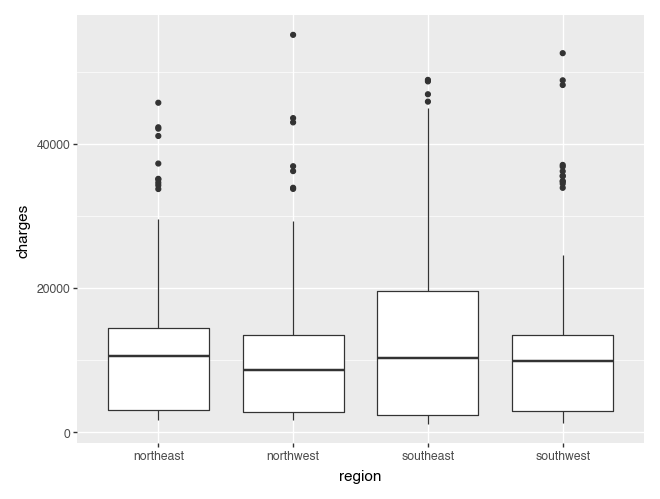

In [7]:
plot1 = (ggplot(df, aes(x = "region",y = "charges"))
+ geom_boxplot())
plot1

This boxplot shows insurance charges by region. The southeast region has higher and more varied costs compared **to** other regions. The dots above the boxes are outliers, showing people with extremely high medical expenses due to health conditions, age, smoking habits etc. Thus, the plot seems to have some impact on insurance charges.

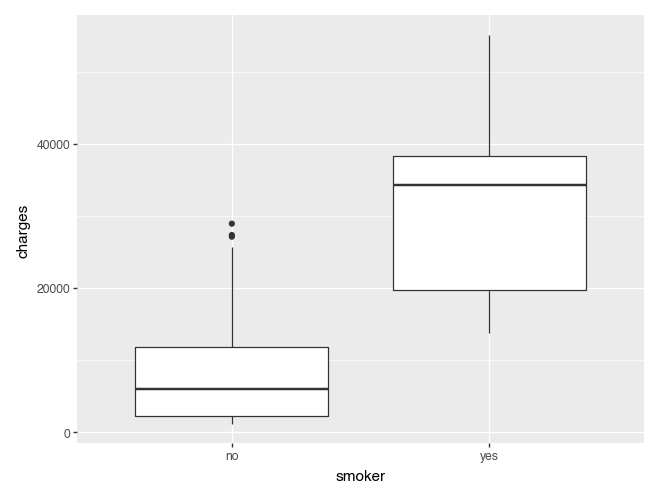

In [8]:
plot2 = (ggplot(df, aes(x = "smoker",y = "charges"))
+ geom_boxplot())
plot2

This boxplot shows insurance charges by smoking status. Smokers usually have much higher and more varied charges than non-smokers. The dots above the boxes are outliers, showing people with extremely high medical costs. This shows that smoking and insurance charges are highly correlated.

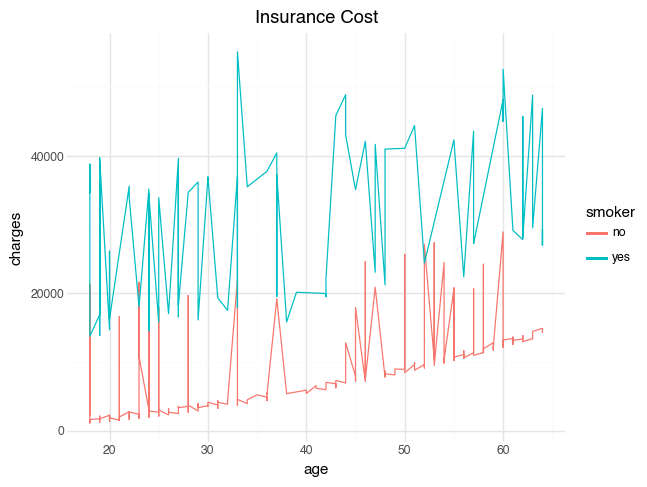

In [9]:
plot3 = (
    ggplot(df, aes(x='age', y='charges', color='smoker'))
    + geom_line()
    + labs(
        title='Insurance Cost',
        x='age',
        y='charges'
    )
    + theme_minimal()
)
plot3

This boxplot shows insurance charges by age. As age increases, insurance charges rise for both groups, but smokers have much higher costs at every age compared to non-smokers.

#Part Two: Simple Linear Models


### 1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.



In [10]:
# define variables
X = df[['age']]  # predictor variable
y = df['charges']      # response variable

In [11]:
cost_model1 = LinearRegression() # specifying model for prediction
cost_model1.fit(X, y) #checking model fit

LinearRegression()

In [12]:
cost_model1.coef_, cost_model1.intercept_ #model coefficients

(array([228.79904937]), np.float64(3611.758798507093))

Interpretation of model coefficients: For every additional year of age, the predicted insurance charges increase by  $228.80 approx, assuming all other factors remain constant.

In [13]:
model1_pred = cost_model1.predict(X)

In [14]:
rmse_model1 = root_mean_squared_error(y, model1_pred)
print("Root Mean Squared Error for Model 1:", rmse_model1)

Root Mean Squared Error for Model 1: 11257.853610269762


Interpretation of RMSE: RMSE of \$11257.85 incates that the model's predictions are not very accurate and on average differ from actual by about \$11000 approx

In [15]:
mse_model1 = mean_squared_error(y, model1_pred)
mse_model1

126739267.9102639

In [16]:
r2_model1 = r2_score(y, model1_pred)
print("RSquare of Model 1:", r2_model1)

RSquare of Model 1: 0.09938105452062695


Interpretation of Rsquare: Rsquare of this model is vey low 0.09. Thus, it explains only about 9% of the variation in charges.

### 2. Make a model that also incorporates the variable sex. Report your results.

In [17]:
X = df[['age', 'sex']]  # predictor variables
y = df['charges']      # response variable

In [18]:
# One-hot encoding
X_enc = pd.get_dummies(X, drop_first = True)
X_enc.head()

,age,sex_male
0,19,False
1,33,True
2,32,True
3,31,False
4,60,False


In [19]:
cost_model2 = LinearRegression() # specifying model for prediction
cost_model2.fit(X_enc, y) #checking model fit

LinearRegression()

In [20]:
cost_model2.coef_, cost_model2.intercept_

(array([228.42586236, 649.83258997]), np.float64(3315.3323465342473))

Interpretation of model coefficients: Being male increases the predicted charges by about $649.83 compared to females.

In [21]:
model2_pred = cost_model2.predict(X_enc)

In [22]:
rmse_model2 = root_mean_squared_error(y, model2_pred)
print("Root Mean Squared Error for Model 2:", rmse_model2)

Root Mean Squared Error for Model 2: 11253.174648932223


Interpretation of RMSE: RMSE of \$11253.85 indicates that the model's predictions are not very accurate and on average differ from actual by about \$11000 approx

In [23]:
r2_model2 = r2_score(y, model2_pred)
print("RSquare of model2:", r2_model2)

RSquare of model2: 0.10012952499706418


Interpretation of Rsquare: Rsquare of this model is vey low 0.100. Thus, it explains only about 10% of the variation in charges.

### 3. Now make a model that does not include sex, but does include smoker. Report your results.

In [24]:
X = df[['age', 'smoker']]  # predictor variables
y = df['charges']      # response variable

In [25]:
# One-hot encoding
X_enc = pd.get_dummies(X, drop_first = True)
X_enc.head()

,age,smoker_yes
0,19,True
1,33,False
2,32,False
3,31,False
4,60,False


In [26]:
cost_model3 = LinearRegression() # specifying model for prediction
cost_model3.fit(X_enc, y) #checking model fit

LinearRegression()

In [27]:
cost_model3.coef_, cost_model3.intercept_

(array([  253.14535549, 24048.86743795]), np.float64(-2166.852295375442))

Interpretation of model coefficients: For each additional year of age, the predicted insurance charge increases by about \$253,
holding the smoking status constant. And if a person is a smoker, their predicted insurance charge increases by about \$24,049. This shows that smoking is highly correlated to insurance cost

In [28]:
model3_pred = cost_model3.predict(X_enc)

In [29]:
rmse_model3 = root_mean_squared_error(y, model3_pred)
print("Root Mean Squared Error for Model 3:", rmse_model3)

Root Mean Squared Error for Model 3: 5806.877944751699


Interpretation of RMSE: RMSE of \$5806.88 indicates that the model's predictions are not very accurate and on average differ from actual by about \$5800 approx

In [30]:
r2_model3 = r2_score(y, model3_pred)
print("RSquare of model3:", r2_model3)

RSquare of model3: 0.7603842948069405


Interpretation of Rsquare: Rsquare of this model is 0.76. Thus, it explains only about 76% of the variation in charges.

### 4.Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [31]:
mse_model2 = rmse_model2**2
mse_model3 = rmse_model3**2

print("MSE of Model 2:", mse_model2)
print("MSE of Model 3:", mse_model3)

print("R-squared of Model 2:", r2_model2)
print("R-squared of Model 3:", r2_model3)

MSE of Model 2: 126633939.67937087
MSE of Model 3: 33719831.46524372
R-squared of Model 2: 0.10012952499706418
R-squared of Model 3: 0.7603842948069405


Interpretation: Model 2 has a much higher MSE than Model 3, meaning its predictions are less accurate and differ more from the actual values. The R² value for Model 2 is 0.10 is also much lower than Model 3 is 0.76, showing that Model 2 explains only about 10% of the variation in insurance charges, while Model 3 explains about 76%.
This means that age and sex alone are not good predictors of insurance costs.
When the smoker variable is added in Model 3, the model fits the data much better. Smoking, along with age, has a strong effect on increasing insurance charges.

#Part Three: Multiple Linear Models

### 1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [32]:
X = df[['age', 'bmi']]  # predictor variables
y = df['charges']      # response variable

In [33]:
simple_model = LinearRegression() # specifying model for prediction
simple_model.fit(X, y) #checking model fit

LinearRegression()

In [34]:
simple_model.coef_, simple_model.intercept_

(array([216.29721472, 283.20380126]), np.float64(-4627.533445708497))

Interpretation of model coefficients: As the age and bmi increases, the insurance cost also increases. For every additional year of age, the predicted insurance charges increase by  \$216.30 approx, holding BMI constant. And for every one unit increase in BMI, the predicted insurance charge increases by about \$283, holding age constant.

In [35]:
# Adding model predictions to a dataframe
df_pred = df[['age', 'bmi','charges']].copy()
df_pred['simple_model_pred'] = simple_model.predict(X)
df_pred

,age,bmi,charges,simple_model_pred
0,19,27.900,16884.92400,7383.499689
1,33,22.705,21984.47061,8940.416948
2,32,28.880,3866.85520,10472.903206
3,31,25.740,3756.62160,9367.346055
4,60,25.840,28923.13692,15668.285662
...,...,...,...,...
426,23,33.400,10795.93733,9806.309455
427,18,31.920,2205.98080,8305.681755
428,18,36.850,1629.83350,9701.876496
429,21,25.800,2007.94500,7221.366136


In [36]:
mse_simple_model = mean_squared_error(y, df_pred["simple_model_pred"])
mse_simple_model

123792439.58129103

In [37]:
mse_model1

126739267.9102639

**Comparison of MSE**: The MSE of this model (\~123 Million) is lower than the MSE of Model in Part 2 Q1 (\~126 M). Adding an extra predictor (i.e., bmi) helps in model fitting.

In [38]:
r2_simple_model = r2_score(y, df_pred["simple_model_pred"])
print("RSquare of Simple Model:", r2_simple_model)

RSquare of Simple Model: 0.12032144234129338


In [39]:
r2_model1

0.09938105452062695

**Comparison of $R^2$**: $R^2$ of this model (\~0.12) is slightly higher than $R^2$ of Model in Part 2 Q1 (\~0.099). Again, this is due to the addition of a predictor (i.e., bmi) which helps in model fitting.

### 2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [40]:
df["age_square"] = df["age"]**2

In [41]:
X = df[['age', 'age_square']]  # predictor variables
y = df['charges']      # response variable

In [42]:
square_model = LinearRegression() #specifying model for prediction

In [43]:
square_model.fit(X, y)

LinearRegression()

In [44]:
square_model.coef_, square_model.intercept_

(array([308.42816984,  -1.00150889]), np.float64(2299.730568726638))

Interpretation of model coefficients: For each additional year of age, charges initially increase by about $308, holding age² constant. The negative value of age square means the relationship between age and insurance charges is curved, not straight. As age increases, charges still go up but at a slower rate.
This shows that the effect of age on charges decreases for older people.

In [45]:
df_pred["square_model_pred"] = square_model.predict(X)
df_pred

,age,bmi,charges,simple_model_pred,square_model_pred
0,19,27.900,16884.92400,7383.499689,7798.321085
1,33,22.705,21984.47061,8940.416948,11387.216989
2,32,28.880,3866.85520,10472.903206,11143.886897
3,31,25.740,3756.62160,9367.346055,10898.553787
4,60,25.840,28923.13692,15668.285662,17199.988743
...,...,...,...,...,...
426,23,33.400,10795.93733,9806.309455,8863.780270
427,18,31.920,2205.98080,8305.681755,7526.948744
428,18,36.850,1629.83350,9701.876496,7526.948744
429,21,25.800,2007.94500,7221.366136,8335.056713


In [46]:
mse_square_model = mean_squared_error(y, df_pred["square_model_pred"])
mse_square_model

126710293.80956802

In [47]:
mse_model1

126739267.9102639

**Comparison of MSE**: The MSE of this model is very similar to the MSE of Model in Part 2 Q1 (\~126 M). Adding $age^2$ didn't really improve model fitting.

In [48]:
r2_square_model = r2_score(y, df_pred["square_model_pred"])
print("RSquare of Square Model:", r2_square_model)

RSquare of Square Model: 0.09958694669946933


In [49]:
r2_model1

0.09938105452062695

**Comparison of $R^2$**: $R^2$ of this model is very close to the $R^2$ of Model in Part 2 Q1 (\~0.099). Adding $age^2$ didn't really improve model fitting.

###3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [50]:
df["age_cube"] = df["age"]**3
df["age_deg4"] = df["age"]**4

In [51]:
X = df[['age', 'age_square', 'age_cube', 'age_deg4']]  # predictor variables
y = df['charges']      # response variable

In [52]:
deg4_model = LinearRegression() #specifying model for prediction

In [53]:
deg4_model.fit(X, y)

LinearRegression()

In [54]:
deg4_model.coef_, deg4_model.intercept_

(array([-7.94841022e+03,  3.58110163e+02, -6.47905090e+00,  4.12933982e-02]),
 np.float64(68637.89783236325))

In [55]:
df_pred["deg4_model_pred"] = deg4_model.predict(X)
df_pred

,age,bmi,charges,simple_model_pred,square_model_pred,deg4_model_pred
0,19,27.900,16884.92400,7383.499689,7798.321085,7837.459352
1,33,22.705,21984.47061,8940.416948,11387.216989,12455.384138
2,32,28.880,3866.85520,10472.903206,11143.886897,11987.304277
3,31,25.740,3756.62160,9367.346055,10898.553787,11498.962833
4,60,25.840,28923.13692,15668.285662,17199.988743,16617.318403
...,...,...,...,...,...,...
426,23,33.400,10795.93733,9806.309455,8863.780270,7989.712606
427,18,31.920,2205.98080,8305.681755,7526.948744,8143.197632
428,18,36.850,1629.83350,9701.876496,7526.948744,8143.197632
429,21,25.800,2007.94500,7221.366136,8335.056713,7676.156132


In [56]:
mse_deg4_model = mean_squared_error(y, df_pred["deg4_model_pred"])
mse_deg4_model

125550389.64569828

In [57]:
mse_model1

126739267.9102639

**Comparison of MSE**: The MSE of this model (\~125 Million) is slightly lower than the MSE of Model in Part 2 Q1 (\~126 M). Adding polynomial model of degree 4 provides a very marginal improvement in model fitting.

In [58]:
r2_deg4_model = r2_score(y, df_pred["deg4_model_pred"])
print("RSquare of Deg4 Model:", r2_deg4_model)

RSquare of Deg4 Model: 0.10782931453183786


In [59]:
r2_model1

0.09938105452062695

**Comparison of $R^2$**: $R^2$ of this model (\~0.11) is slightly higher than $R^2$ of Model in Part 2 Q1 (\~0.099). Adding polynomial model of degree 4 provides just a  marginal improvement in model fitting.

### 4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [60]:
df["age_deg5"] = df["age"]**5
df["age_deg6"] = df["age"]**6
df["age_deg7"] = df["age"]**7
df["age_deg8"] = df["age"]**8
df["age_deg9"] = df["age"]**9
df["age_deg10"] = df["age"]**10
df["age_deg11"] = df["age"]**11
df["age_deg12"] = df["age"]**12

In [61]:
X = df[['age', 'age_square', 'age_cube', 'age_deg4', 'age_deg5', 'age_deg6', 'age_deg7', 'age_deg8', 'age_deg9', 'age_deg10', 'age_deg11', 'age_deg12']]  # predictor variables
y = df['charges']      # response variable

In [62]:
deg12_model = LinearRegression() #specifying model for prediction

In [63]:
deg12_model.fit(X, y)

LinearRegression()

In [64]:
deg12_model.coef_, deg12_model.intercept_

(array([ 3.04916864e-12,  1.05406037e-10,  3.49790534e-09,  7.56584415e-08,  1.26243848e-06,  1.25112288e-05,
        -2.08398111e-08, -1.85914310e-08,  4.09818395e-10, -2.52044310e-12, -1.01992192e-17,  1.42766013e-16]),
 np.float64(7452.28232594397))

In [65]:
df_pred["deg12_model_pred"] = deg12_model.predict(X)
df_pred

,age,bmi,charges,simple_model_pred,square_model_pred,deg4_model_pred,deg12_model_pred
0,19,27.900,16884.92400,7383.499689,7798.321085,7837.459352,7826.748206
1,33,22.705,21984.47061,8940.416948,11387.216989,12455.384138,12021.945254
2,32,28.880,3866.85520,10472.903206,11143.886897,11987.304277,11516.673647
3,31,25.740,3756.62160,9367.346055,10898.553787,11498.962833,11044.243344
4,60,25.840,28923.13692,15668.285662,17199.988743,16617.318403,17199.598449
...,...,...,...,...,...,...,...
426,23,33.400,10795.93733,9806.309455,8863.780270,7989.712606,8422.521989
427,18,31.920,2205.98080,8305.681755,7526.948744,8143.197632,7735.031711
428,18,36.850,1629.83350,9701.876496,7526.948744,8143.197632,7735.031711
429,21,25.800,2007.94500,7221.366136,8335.056713,7676.156132,8074.293614


In [66]:
mse_deg12_model = mean_squared_error(y, df_pred["deg12_model_pred"])
mse_deg12_model

125373053.69365598

In [67]:
mse_model1

126739267.9102639

**Comparison of MSE**: The MSE of this model (\~125 Million) is slightly lower than the MSE of Model in Part 2 Q1 (\~126 M). Adding polynomial model of degree 12 provides just a marginal improvement in model fitting.

In [68]:
r2_deg12_model = r2_score(y, df_pred["deg12_model_pred"])
print("RSquare of Deg12 Model:", r2_deg12_model)

RSquare of Deg12 Model: 0.10908947739025832


In [69]:
r2_model1

0.09938105452062695

**Comparison of $R^2$**: $R^2$ of this model (\~0.11) is slightly higher than $R^2$ of Model in Part 2 Q1 (\~0.099). Adding polynomial model of degree 12 provides just a marginal improvement in model fitting.

###5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

Model 1 using age and bmi as predictors proves to the best model in terms of MSE and $R^2$.

For the reliable estimation of the model's performance, it must be tested on data that was not used in training/fitting. Only then, we can identify the model with the best performance. Since we didn't really evaluate these models on unseen test data in this question, we can't conclude that Model 1 is indeed the best model.

###6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

In [70]:
# Selecting columns of interest
my_df = df_pred[['age', 'charges', 'deg12_model_pred']]
my_df

,age,charges,deg12_model_pred
0,19,16884.92400,7826.748206
1,33,21984.47061,12021.945254
2,32,3866.85520,11516.673647
3,31,3756.62160,11044.243344
4,60,28923.13692,17199.598449
...,...,...,...
426,23,10795.93733,8422.521989
427,18,2205.98080,7735.031711
428,18,1629.83350,7735.031711
429,21,2007.94500,8074.293614


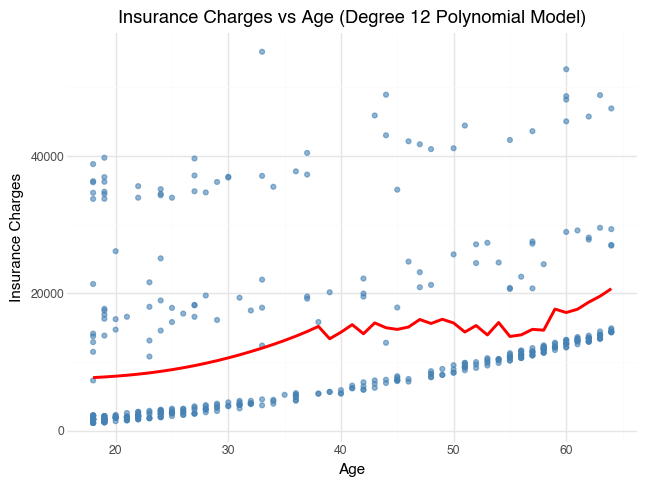

In [71]:
# Create the plot
plot = (
    ggplot(my_df, aes(x='age', y='charges')) +
    geom_point(color='steelblue', alpha=0.6) +
    geom_line(aes(y='deg12_model_pred'), color='red', size=1.2) +  # model predictions
    labs(
        title='Insurance Charges vs Age (Degree 12 Polynomial Model)',
        x='Age',
        y='Insurance Charges'
    ) +
    theme_minimal()
)

plot


#Part Four: New data

In [72]:
df_new = pd.read_csv('https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1')
df_new

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790
...,...,...,...,...,...,...
138,19,male,34.900,yes,southwest,34828.65400
139,45,male,30.360,yes,southeast,62592.87309
140,43,male,27.800,yes,southwest,37829.72420
141,24,female,27.720,no,southeast,2464.61880


### Model 1 - Only age as a predictor

In [73]:
# define the training data
X_train = df[['age']]  # predictor variable
y_train = df['charges']      # response variable
X_test = df_new[['age']]
y_test = df_new['charges']

In [74]:
cost_model1 = LinearRegression() # specifying model for prediction
cost_model1.fit(X_train, y_train) #checking model fit

LinearRegression()

In [75]:
cost_model1.coef_, cost_model1.intercept_ #model coefficients

(array([228.79904937]), np.float64(3611.758798507093))

In [76]:
model1_pred = cost_model1.predict(X_test)
mse_model1_test = mean_squared_error(y_test, model1_pred)
mse_model1_test

136077136.50195494

### Model 2 - age and bmi as a predictor

In [77]:
# define the training data
X_train = df[['age', 'bmi']]  # predictor variable
y_train = df['charges']      # response variable
X_test = df_new[['age', 'bmi']]
y_test = df_new['charges']

In [78]:
cost_model2 = LinearRegression() # specifying model for prediction
cost_model2.fit(X_train, y_train) #checking model fit

LinearRegression()

In [79]:
cost_model2.coef_, cost_model2.intercept_ #model coefficients

(array([216.29721472, 283.20380126]), np.float64(-4627.533445708497))

In [80]:
model2_pred = cost_model2.predict(X_test)
mse_model2_test = mean_squared_error(y_test, model2_pred)
mse_model2_test

132636406.11081287

### Model 3 - age, bmi, and smoker as predictors (no interaction terms)

In [81]:
# define the training data
X_train = df[['age', 'bmi', 'smoker']]  # predictor variable
y_train = df['charges']      # response variable
X_test = df_new[['age', 'bmi', 'smoker']]
y_test = df_new['charges']

In [82]:
# One-hot encoding
X_train_enc = pd.get_dummies(X_train, drop_first = True)
X_train_enc.head()

,age,bmi,smoker_yes
0,19,27.900,True
1,33,22.705,False
2,32,28.880,False
3,31,25.740,False
4,60,25.840,False


In [83]:
cost_model3 = LinearRegression() # specifying model for prediction
cost_model3.fit(X_train_enc, y_train) #checking model fit

LinearRegression()

In [84]:
cost_model3.coef_, cost_model3.intercept_ #model coefficients

(array([  240.72164671,   281.31845364, 24043.82827651]),
 np.float64(-10350.082987156056))

In [85]:
# One-hot encoding
X_test_enc = pd.get_dummies(X_test, drop_first = True)
X_test_enc.head()

,age,bmi,smoker_yes
0,23,34.400,False
1,56,40.300,False
2,18,34.100,False
3,63,23.085,False
4,63,28.310,False


In [86]:
model3_pred = cost_model3.predict(X_test_enc)
mse_model3_test = mean_squared_error(y_test, model3_pred)
mse_model3_test

35377541.2414163

### Model 4 - age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

In [87]:
df['smoker_flag'] = (df['smoker'] == 'yes').astype(int)
df_new['smoker_flag'] = (df_new['smoker'] == 'yes').astype(int)

# Define Interactions
df['age_smoker'] = df['age'] * df['smoker_flag']
df['bmi_smoker'] = df['bmi'] * df['smoker_flag']

df_new['age_smoker'] = df_new['age'] * df_new['smoker_flag']
df_new['bmi_smoker'] = df_new['bmi'] * df_new['smoker_flag']

In [88]:
# define training and test data
X_train = df[['age_smoker', 'bmi_smoker']]  # predictor variable
y_train = df['charges']      # response variable
X_test = df_new[['age_smoker', 'bmi_smoker']]
y_test = df_new['charges']

In [89]:
cost_model4 = LinearRegression() # specifying model for prediction
cost_model4.fit(X_train, y_train) #checking model fit

LinearRegression()

In [90]:
cost_model4.coef_, cost_model4.intercept_ #model coefficients

(array([107.05762116, 677.00833574]), np.float64(7307.023657911378))

In [91]:
model4_pred = cost_model4.predict(X_test)
mse_model4_test = mean_squared_error(y_test, model4_pred)
mse_model4_test

47626025.358144134

### Model 5: age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

In [92]:
# define training and test data
X_train = df[['age', 'bmi', 'smoker_flag', 'age_smoker', 'bmi_smoker']]  # predictor variable
y_train = df['charges']      # response variable
X_test = df_new[['age', 'bmi', 'smoker_flag', 'age_smoker', 'bmi_smoker']]
y_test = df_new['charges']

In [93]:
cost_model5 = LinearRegression() # specifying model for prediction
cost_model5.fit(X_train, y_train) #checking model fit

LinearRegression()

In [94]:
cost_model5.coef_, cost_model5.intercept_ #model coefficients

(array([ 2.58179772e+02,  5.36117114e+00, -2.09937051e+04, -1.24532947e+01,  1.48116585e+03]),
 np.float64(-2524.6856900840467))

In [95]:
model5_pred = cost_model5.predict(X_test)
mse_model5_test = mean_squared_error(y_test, model5_pred)
mse_model5_test

21786256.866852593

### Report the MSE for each model’s new predictions. Based on this, which is the best model to use?



In [96]:
# MSE for each model
print("MSE for Model 1:", mse_model1_test)
print("MSE for Model 2:", mse_model2_test)
print("MSE for Model 3:", mse_model3_test)
print("MSE for Model 4:", mse_model4_test)
print("MSE for Model 5:", mse_model5_test)

MSE for Model 1: 136077136.50195494
MSE for Model 2: 132636406.11081287
MSE for Model 3: 35377541.2414163
MSE for Model 4: 47626025.358144134
MSE for Model 5: 21786256.866852593


Based on the above MSE values, we can say that Model 5 is the best.

### Make a plot showing the residuals of your final chosen model.

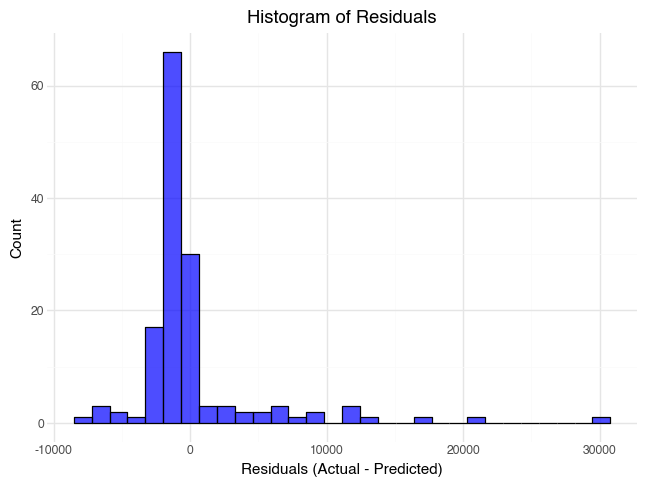

In [97]:
df_new['residuals'] = y_test - model5_pred

plot = (
    ggplot(df_new, aes(x='residuals')) +
    geom_histogram(bins=30, fill='blue', color='black', alpha=0.7) +
    labs(
        title='Histogram of Residuals',
        x='Residuals (Actual - Predicted)',
        y='Count'
    ) +
    theme_minimal()
)

plot

# Part Five: Full Exploration


Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

In [98]:
df1 = df[["age", "bmi", "sex", "smoker", "region", "charges"]].copy()
df1_new = df_new[["age", "bmi", "sex", "smoker", "region", "charges"]].copy()

In [99]:
# Polynomial terms
df1['age_square'] = df1['age']**2
df1['bmi_square'] = df1['bmi']**2

df1_new['age_square'] = df1_new['age']**2
df1_new['bmi_square'] = df1_new['bmi']**2

In [100]:
# Encode categorical variables
df1_enc = pd.get_dummies(df1, columns = ['sex', 'region', 'smoker'], drop_first = True)
df1_new_enc = pd.get_dummies(df1_new, columns = ['sex', 'region', 'smoker'], drop_first = True)

In [101]:
# Interaction terms (age × smoker, bmi × smoker)
df1_enc['age_smoker'] = df1_enc['age'] * df1_enc['smoker_yes']
df1_enc['bmi_smoker'] = df1_enc['bmi'] * df1_enc['smoker_yes']

df1_new_enc['age_smoker'] = df1_new_enc['age'] * df1_new_enc['smoker_yes']
df1_new_enc['bmi_smoker'] = df1_new_enc['bmi'] * df1_new_enc['smoker_yes']

In [102]:
df1_enc.columns

Index(['age', 'bmi', 'charges', 'age_square', 'bmi_square', 'sex_male', 'region_northwest',
       'region_southeast', 'region_southwest', 'smoker_yes', 'age_smoker', 'bmi_smoker'],
      dtype='object')

In [103]:
predictors = ['age', 'bmi', 'age_square', 'bmi_square', 'sex_male',
              'smoker_yes', 'age_smoker', 'bmi_smoker']

X_train = df1_enc[predictors]
y_train = df1_enc['charges']

X_test = df1_new_enc[predictors]
y_test = df1_new_enc['charges']

In [104]:
best_model = LinearRegression() # specifying model for prediction
best_model.fit(X_train, y_train) #checking model fit

LinearRegression()

In [105]:
best_model.coef_, best_model.intercept_ #model coefficients

(array([ 1.43109729e+02,  3.91821639e+02,  1.46254203e+00, -6.32442691e+00, -3.94932378e+02, -2.12778844e+04,
        -1.52318569e+01,  1.49451690e+03]),
 np.float64(-6138.7634473105645))

In [106]:
best_model_pred = best_model.predict(X_test)
best_model_mse = mean_squared_error(y_test, best_model_pred)
best_model_mse

21718621.984325305

### Make a plot showing the residuals of your final chosen model.

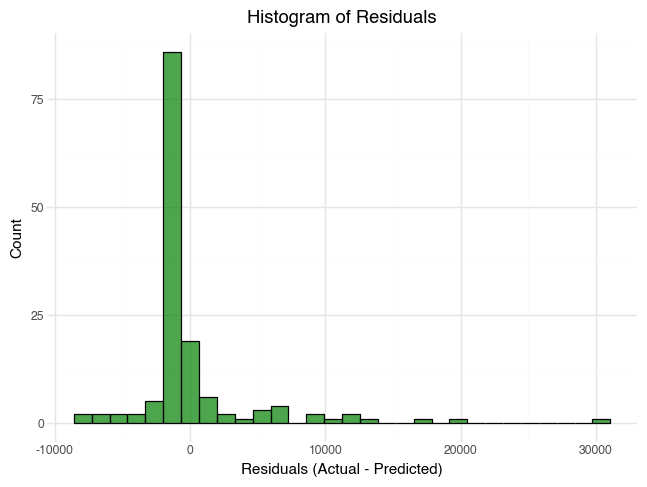

In [107]:
df1_new['residuals'] = y_test - best_model_pred

plot = (
    ggplot(df1_new, aes(x='residuals')) +
    geom_histogram(bins=30, fill='green', color='black', alpha=0.7) +
    labs(
        title='Histogram of Residuals',
        x='Residuals (Actual - Predicted)',
        y='Count'
    ) +
    theme_minimal()
)

plot